# Task 1: Exploratory Data Analysis and Data Preprocessing

## Objective
Understand the structure, content, and quality of the complaint data and prepare it for the RAG pipeline.

## Instructions
1. Load the full CFPB complaint dataset.
2. Perform an initial EDA to understand the data.
3. Analyze the distribution of complaints across different Products.
4. Calculate and visualize the length (word count) of the Consumer complaint narrative.
5. Identify the number of complaints with and without narratives.
6. Filter the dataset to meet the project's requirements (Specific Products + Non-empty Narratives).
7. Clean the text narratives.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_theme(style="whitegrid")
pd.set_option('display.max_columns', None)

## 1. Load the Data
We will load the dataset from `../data/raw/complaints.csv`.

In [21]:
# Define file path
data_path = "../data/raw/complaints.csv"

# Load data
try:
    df = pd.read_csv(data_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"File not found at {data_path}. Please check the path.")

# Display first few rows
df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_20592\3299183728.py:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path)


Dataset loaded successfully.


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


## 2. Initial EDA
Let's check the shape of the dataset, data types, and missing values.

In [22]:
print(f"Dataset Shape: {df.shape}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (9609797, 18)

Data Types:
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

Missing Values:
Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrat

## 3. Product Distribution
Analyze the distribution of complaints across different Products.

C:\Users\dell\AppData\Local\Temp\ipykernel_20592\898150670.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")


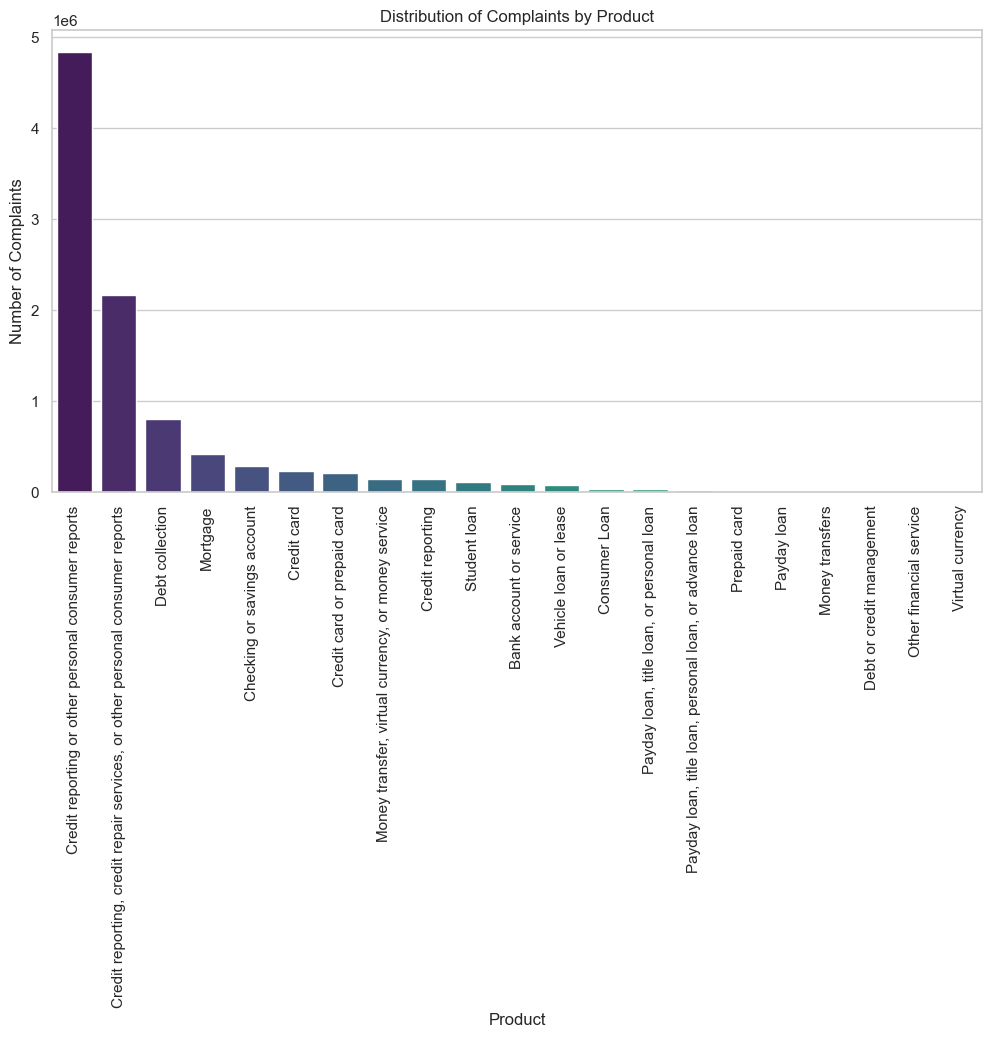

In [23]:
plt.figure(figsize=(12, 6))
product_counts = df['Product'].value_counts()
sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")
plt.title("Distribution of Complaints by Product")
plt.xlabel("Product")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=90)
plt.savefig('../reports/figures/product_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Narrative Length Analysis
Calculate and visualize the length (word count) of the `Consumer complaint narrative`.

C:\Users\dell\AppData\Local\Temp\ipykernel_20592\2339862601.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_narrative['word_count'] = df_narrative['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))


count    2.980756e+06
mean     1.755976e+02
std      2.259282e+02
min      1.000000e+00
25%      5.900000e+01
50%      1.140000e+02
75%      2.090000e+02
max      6.469000e+03
Name: word_count, dtype: float64


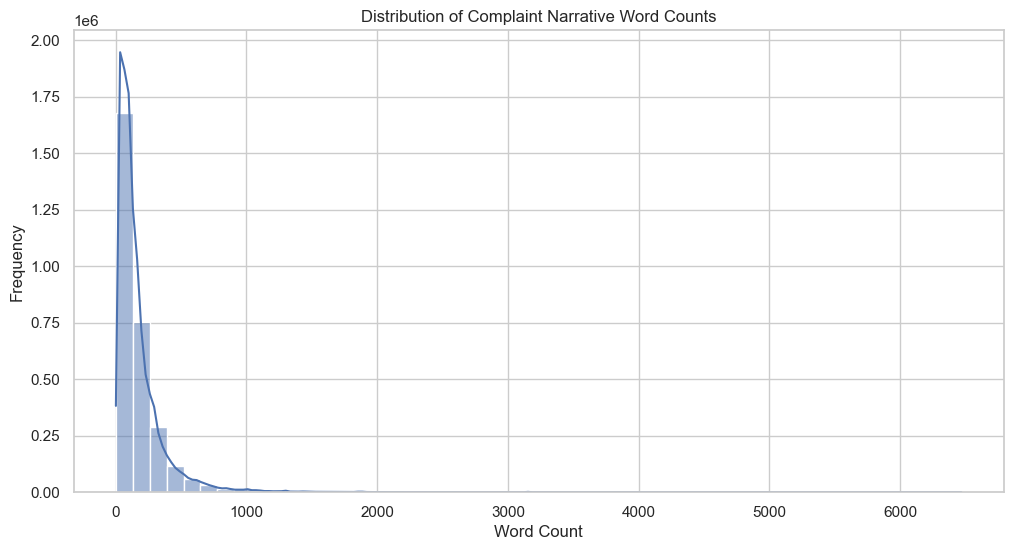

In [24]:
# Filter for non-empty narratives for this analysis
df_narrative = df.dropna(subset=['Consumer complaint narrative'])

# Calculate word count
df_narrative['word_count'] = df_narrative['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))

# Describe statistics
print(df_narrative['word_count'].describe())

# Identify short and long narratives (Explicit Requirement)
short_threshold = 10
long_threshold = 1000
num_short = len(df_narrative[df_narrative['word_count'] < short_threshold])
num_long = len(df_narrative[df_narrative['word_count'] > long_threshold])

print(f"\nShort Narratives (<{short_threshold} words): {num_short}")
print(f"Long Narratives (>{long_threshold} words): {num_long}")

# Visualize
plt.figure(figsize=(12, 6))
sns.histplot(df_narrative['word_count'], bins=50, kde=True)
plt.title("Distribution of Complaint Narrative Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.savefig('../reports/figures/narrative_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Missing Narratives Analysis
Identify the number of complaints with and without narratives.

In [25]:
total_complaints = len(df)
missing_narratives = df['Consumer complaint narrative'].isnull().sum()
present_narratives = total_complaints - missing_narratives

print(f"Total Complaints: {total_complaints}")
print(f"With Narratives: {present_narratives} ({present_narratives/total_complaints:.2%})")
print(f"Without Narratives: {missing_narratives} ({missing_narratives/total_complaints:.2%})")

Total Complaints: 9609797
With Narratives: 2980756 (31.02%)
Without Narratives: 6629041 (68.98%)


## EDA Summary Findings
Based on the initial EDA, here are the key findings:
- **Dataset Shape**: The dataset contains approximately 9.6 million records.
- **Missing Narratives**: A significant portion (~69%) of the complaints do not have a consumer narrative.
- **Narrative Length**: The average narrative length is around 176 words.
- **Product Distribution**: There is a diverse distribution of products, with some categories having significantly more complaints.

**Filtering Strategy**:
We will filter the dataset to include only records with non-empty narratives and specific products of interest for the RAG chatbot.

## 6. Data Filtering
Filter the dataset to meet requirements:
1. Products: Credit card, Personal loan, Savings account, Money transfers.
2. Remove empty `Consumer complaint narrative`.

In [26]:
# List of target products (5 categories as per Task 2 consistency)
target_products = [
    'Credit card or prepaid card',
    'Payday loan, title loan, personal loan, or advance loan',
    'Checking or savings account',
    'Money transfer, virtual currency, or money service',
    'Debt collection'
]

df_filtered = df[
    (df['Product'].isin(target_products)) & 
    (df['Consumer complaint narrative'].notnull())
].copy()

print(f"Filtered Dataset Shape: {df_filtered.shape}")
print("\nCounts by Product in Filtered Data:")
print(df_filtered['Product'].value_counts())

Filtered Dataset Shape: (82164, 18)

Counts by Product in Filtered Data:
Product
Credit card        80667
Money transfers     1497
Name: count, dtype: int64


## 7. Text Preprocessing
Clean the text narratives:
1. Lowercase text.
2. Remove special characters.
3. Remove boilerplate "I am writing to file a complaint..."

In [27]:
import re

def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove boilerplate (example patterns)
    # Note: The 'X's are common in CFPB data for redacted info, checking for specific boilerplate
    boilerplate = "i am writing to file a complaint"
    text = text.replace(boilerplate, "")
    
    # 3. Remove Special characters (keep alphanumeric and basic punctuation or just alphanumeric?)
    # For RAG/Embeddings, keeping some punctuation is often good, but let's strip excessive noise.
    # Here filtering to allow typical sentence chars.
    text = re.sub(r'[^a-zA-Z0-9\s.,!?]', '', text)
    
    # 4. Collapse multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply cleaning
df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)

# Preview
print(df_filtered[['Consumer complaint narrative', 'cleaned_narrative']].head())

                            Consumer complaint narrative  \
12237  A XXXX XXXX card was opened under my name by a...   
13280  Dear CFPB, I have a secured credit card with c...   
13506  I have a Citi rewards cards. The credit balanc...   
13955  b'I am writing to dispute the following charge...   
14249  Although the account had been deemed closed, I...   

                                       cleaned_narrative  
12237  a xxxx xxxx card was opened under my name by a...  
13280  dear cfpb, i have a secured credit card with c...  
13506  i have a citi rewards cards. the credit balanc...  
13955  bi am writing to dispute the following charges...  
14249  although the account had been deemed closed, i...  


## 8. Save Processed Data
Save the cleaned dataset for the next steps.

In [28]:
output_parquet = "../data/processed/complaints_processed.parquet"
output_csv = "../data/filtered_complaints.csv"
os.makedirs(os.path.dirname(output_parquet), exist_ok=True)
os.makedirs(os.path.dirname(output_csv), exist_ok=True)

df_filtered.to_parquet(output_parquet, index=False)
df_filtered.to_csv(output_csv, index=False)
print(f"Processed data saved to {output_parquet} and {output_csv}")

Processed data saved to ../data/processed/complaints_processed.parquet
